# Sajjad Rahbari

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from platformdirs import user_data_path

In [73]:
data = pd.read_csv('User_Data.csv')

In [74]:
data

,ID-Number,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## processing before learn

In [75]:
data = data.loc[:,("Gender","Age","EstimatedSalary","Purchased")]
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Gender = le.fit_transform(data["Gender"])
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


## learn model

In [77]:
x = data.iloc[:,:3]
y = data.iloc[:,3]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

model2 = DecisionTreeClassifier(criterion='gini', random_state=0)
model2.fit(x_train, y_train)
predictions2 = model2.predict(x_test)


## final scores

In [79]:
from sklearn.metrics import accuracy_score , precision_score , recall_score ,f1_score
accuracyG = []
precisionG = []
recallG = []
f1G = []
accuracyE = []
precisionE = []
recallE= []
f1E= []
for i in range(1,30):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=i, random_state=0)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyE.append(accuracy_score(y_test, predictions))
    precisionE.append(precision_score(y_test, predictions))
    recallE.append(recall_score(y_test, predictions))
    f1E.append(f1_score(y_test, predictions))
    
    model2 = DecisionTreeClassifier(criterion='gini',max_depth=i, random_state=0)
    model2.fit(x_train, y_train)
    predictions2 = model2.predict(x_test)
    accuracyG.append(accuracy_score(y_test, predictions2))
    precisionG.append(precision_score(y_test, predictions2))
    recallG.append(recall_score(y_test, predictions2))
    f1G.append(f1_score(y_test, predictions2))

In [80]:
import seaborn as sns
dataScoresG = {
    'AccuracyG' : accuracyG,
    'PrecisionG' : precisionG,
    'RecallG' : recallG,
    'F1 ScoreG' : f1G
}
dataScoresE = {
    'AccuracyE' : accuracyE,
    'PrecisionE' : precisionE,
    'RecallE' : recallE,
    'F1 ScoreE' : f1E
}
dfScoresG = pd.DataFrame(dataScoresG)
dfScoresE = pd.DataFrame(dataScoresE)



<Axes: >

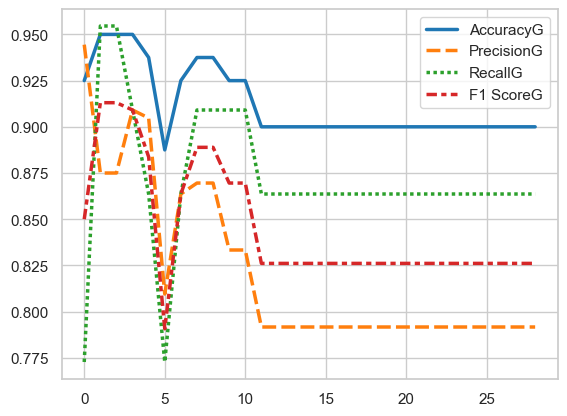

In [81]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=dfScoresG, palette="tab10", linewidth=2.5)

<Axes: >

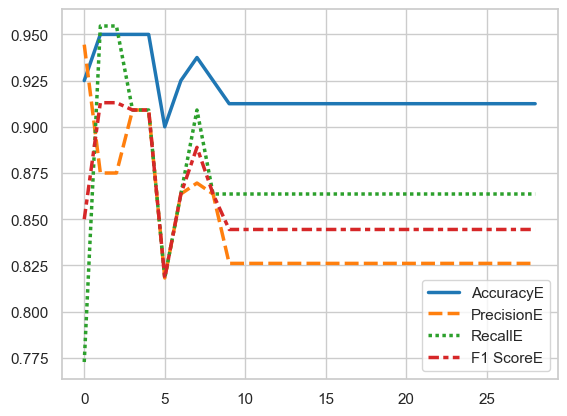

In [82]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=dfScoresE, palette="tab10", linewidth=2.5)

In [88]:
dfScoresE

,AccuracyE,PrecisionE,RecallE,F1 ScoreE
0,0.9250,0.944444,0.772727,0.850000
1,0.9500,0.875000,0.954545,0.913043
2,0.9500,0.875000,0.954545,0.913043
3,0.9500,0.909091,0.909091,0.909091
4,0.9500,0.909091,0.909091,0.909091
5,0.9000,0.818182,0.818182,0.818182
6,0.9250,0.863636,0.863636,0.863636
7,0.9375,0.869565,0.909091,0.888889
8,0.9250,0.863636,0.863636,0.863636
9,0.9125,0.826087,0.863636,0.844444


In [89]:
dfScoresG

,AccuracyG,PrecisionG,RecallG,F1 ScoreG
0,0.9250,0.944444,0.772727,0.850000
1,0.9500,0.875000,0.954545,0.913043
2,0.9500,0.875000,0.954545,0.913043
3,0.9500,0.909091,0.909091,0.909091
4,0.9375,0.904762,0.863636,0.883721
5,0.8875,0.809524,0.772727,0.790698
6,0.9250,0.863636,0.863636,0.863636
7,0.9375,0.869565,0.909091,0.888889
8,0.9375,0.869565,0.909091,0.888889
9,0.9250,0.833333,0.909091,0.869565


## Relearn by best hyper parameter

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

modelF = DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=0)
modelF.fit(x_train, y_train)
predictionsF = modelF.predict(x_test)

[Text(0.5, 0.8333333333333334, 'x[1] <= 44.5\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.25, 0.5, 'x[2] <= 90500.0\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(0.75, 0.5, 'x[2] <= 41500.0\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.362\nsamples = 59\nvalue = [14, 45]')]

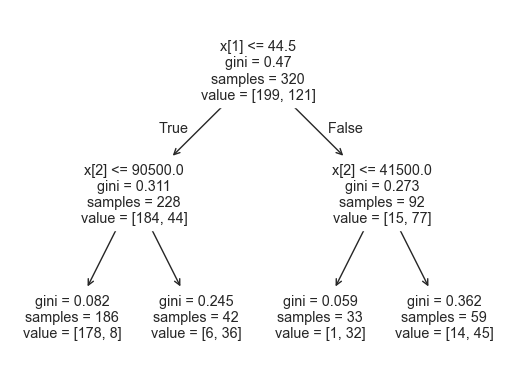

In [100]:
from sklearn import tree
tree.plot_tree(modelF)

## result for user

In [116]:
print(x_test)


     Gender  Age  EstimatedSalary
132       1   30            87000
309       0   38            50000
341       1   35            75000
196       0   30            79000
246       0   35            50000
..      ...  ...              ...
14        1   18            82000
363       0   42            79000
304       0   40            60000
361       0   53            34000
329       0   47           107000

[80 rows x 3 columns]


In [ ]:

userEnter = input(" (Format : IDNumber(integer Number),Gender(0 = female , 1 = male),Age(integer Number),EstimatedSalary(integer Number)) \n Enter your Data : ").replace(" ","")

userData = userEnter.split(",")
u = {
    'Gender' : [int(userData[1])],
    'Age' : [int(userData[2])],
    'EstimatedSalary' : [int(userData[3])]
}


userArray = pd.DataFrame(u)
print(f"answer model : {modelF.predict(userArray)}")